### [Twitter Tweets Classification Model](gp)


### Problem Statement

- People post offensive words and hate speech daily on twitter and that is a violation which has to bne checked.

**In this project:**
- We create a model to check these words and block them from being posted on twitter.



In [1]:
# import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# load dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\LASOP\JUNE CLASSES\labeled_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
# drop unwanted columns
df.drop(columns=['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], inplace=True, errors='ignore')
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
# Map target columns class
df['class'] = df['class'].map({0: 'Hate Speech', 1: 'Offensive Language', 2: 'None'})

In [5]:
df.head()

,class,tweet
0,None,!!! RT @mayasolovely: As a woman you shouldn't...
1,Offensive Language,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,Offensive Language,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,Offensive Language,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,Offensive Language,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### Data Cleaning

In [6]:
# # import text cleaning libraries
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# define a function to clean text
def clean(tweet):
    text = str(tweet).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweet"].apply(clean)

0         rt mayasolov woman shouldnt complain clean ho...
1         rt  boy dat coldtyga dwn bad cuffin dat hoe  ...
2         rt urkindofbrand dawg rt  ever fuck bitch sta...
3                   rt cganderson vivabas look like tranni
4         rt shenikarobert shit hear might true might f...
                               ...                        
24778    yous muthafin lie   coreyemanuel right tl tras...
24779    youv gone broke wrong heart babi drove redneck...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl  ntac eileen dahlia  beauti color combin...
Name: tweet, Length: 24783, dtype: object

In [8]:
df.rename(columns={'text': 'tweet'}, inplace=True)

In [9]:
df.head()

,class,tweet
0,None,!!! RT @mayasolovely: As a woman you shouldn't...
1,Offensive Language,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,Offensive Language,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,Offensive Language,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,Offensive Language,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [10]:
# Transform text data into numerical data
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
import pickle

In [11]:
# choose dependent and independent variables
x = np.array(df['tweet']) 
y = np.array(df['class'])

In [12]:
# Transform texts to vectors
cv = CountVectorizer()

In [13]:
# Fit cv on x
x = cv.fit_transform(x)

In [14]:
# Save the CountVectorizer object
with open('cv.pkl', 'wb') as f:
    pickle.dump(cv, f)

In [15]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# print the shape
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (19826, 35852)
Shape of x_test: (4957, 35852)
Shape of y_train: (19826,)
Shape of y_test: (4957,)


### Build the model

In [17]:
#%pip install catboost


In [18]:
# Import support vector classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

In [19]:
svc = SVC(kernel='linear', random_state=42)

In [20]:
model = svc.fit(x_train, y_train)

In [21]:
model

SVC(kernel='linear', random_state=42)

In [22]:
# make prediction
svc_pred = model.predict(x_test)

In [23]:
print(classification_report(svc_pred, y_test))

                    precision    recall  f1-score   support

       Hate Speech       0.33      0.43      0.37       221
              None       0.87      0.85      0.86       852
Offensive Language       0.95      0.93      0.94      3884

          accuracy                           0.90      4957
         macro avg       0.71      0.74      0.72      4957
      weighted avg       0.91      0.90      0.90      4957



<Axes: >

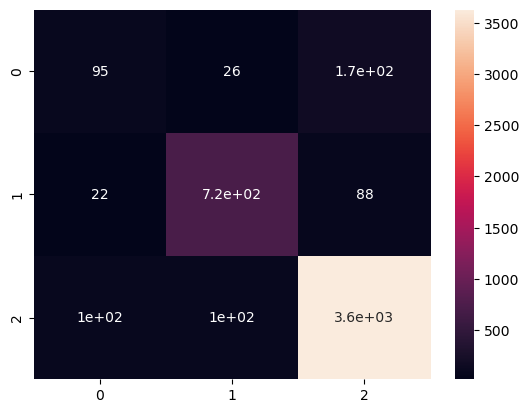

In [24]:
# print and plot confussion matrix
cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(cm, annot=True)

In [25]:
# check model accuracy
accuracy = accuracy_score(y_test, svc_pred)
print('accuracy score is:', accuracy * 100)

accuracy score is: 89.71151906394998


In [26]:
# test the model with user input
user =  input('enter a sentence: ')
data = cv.transform([user]).toarray()
output = model.predict(data)
print(user, '', output)

youre gay man  ['Hate Speech']


In [27]:
# test the model with user input
user =  input('enter a sentence: ')
data = cv.transform([user]).toarray()
output = model.predict(data)
print(user, '', output)

get the hell out of my house  ['Offensive Language']


In [28]:
# test the model with user input
user =  input('enter a sentence: ')
data = cv.transform([user]).toarray()
output = model.predict(data)
print(user, '', output)

stay away from me  ['None']


In [29]:
# test the model with user input
user =  input('enter a sentence: ')
data = cv.transform([user]).toarray()
output = model.predict(data)
print(user, '', output)

i love you  ['None']


In [30]:
# save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)